In [1]:
import torch

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
df = pd.read_csv("D://One Drive Data//Random Activities//Pytorch//diabetes.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [17]:
X=df.drop('Outcome',axis=1).values### independent features

In [18]:
y = df["Outcome"].values

In [19]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [22]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [23]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [24]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [25]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [26]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019209504127502
Epoch number: 21 and the loss : 0.6090320944786072
Epoch number: 31 and the loss : 0.5917771458625793
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389399528503
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135971903800964
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.498340904712677
Epoch number: 121 and the loss : 0.4960552155971527
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4755900204181671
Epoch number: 151 and the loss : 0.4819848835468292
Epoch number: 161 and the loss : 0.4806523025035858
Epoch number: 171 and the loss : 0.4706893563270569
Epoch number: 181 and the loss : 0.45911046862602234
Epoch number: 191 and 

In [27]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
1
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
1
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
0
1
1
0
0
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0


In [44]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[89, 18],
       [19, 28]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

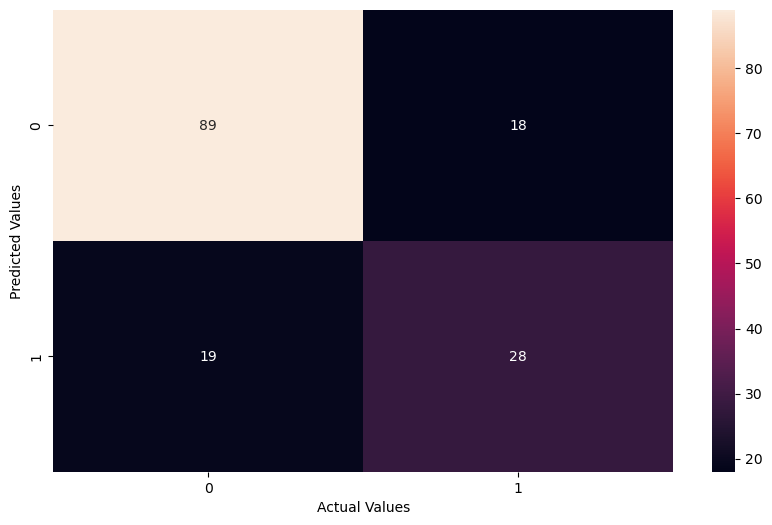

In [45]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [46]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score


0.7597402597402597

In [47]:
#### Save the model
torch.save(model,'diabetes.pt') # pt is to save pytorch file

In [48]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [49]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [50]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [55]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [56]:
new_data=torch.tensor(lst1)

In [57]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data)) # binary output
    print(model(new_data).argmax().item()) # predicting final output, in terms of 0(clear) and 1(diabetic)

tensor([1.5353, 1.2949])
0
